## Final Project
## Tianyi Tan
## One-hot encoding

A representation of categorical variables as binary vectors

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import randint
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [2]:
# load the dataset
survey = pd.read_csv('survey.csv')
survey.shape

(1259, 27)

In [3]:
train_df = survey.drop(['comments'],axis = 1)
train_df = train_df.drop(['Timestamp'],axis = 1)
train_df = train_df.drop(['state'], axis= 1)
train_df.shape

(1259, 24)

In [4]:
# the default string is 'NaN'
train_df['self_employed'] = train_df['self_employed'].fillna('NaN')
train_df['work_interfere'] = train_df['work_interfere'].fillna('NaN')



In [5]:
#There are only 0.014% of self employed so lchange NaN to NOT self_employed
#Replace "NaN" string from defaultString
train_df['self_employed'] = train_df['self_employed'].replace(['NaN'], 'No')
print(train_df['self_employed'].unique())

['No' 'Yes']


In [6]:
#There are only 0.20% of self work_interfere so change NaN to "Don't know
#Replace "NaN" string from defaultString

train_df['work_interfere'] = train_df['work_interfere'].replace(['NaN'], 'Don\'t know' )
print(train_df['work_interfere'].unique())

['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"]


In [7]:
# Fill with median values < 18 and > 120

s = pd.Series(train_df['Age'])
s[s<18] = train_df['Age'].median()
train_df['Age'] = s
s = pd.Series(train_df['Age'])
s[s>120] = train_df['Age'].median()
train_df['Age'] = s

In [8]:
df = train_df.copy()

df['age_range'] = pd.cut(train_df['Age'], [0,20,30,65,100], labels=["0-20", "21-30", "31-65", "66-100"], include_lowest=True)

In [9]:
#clean 'Gender'
#lower case all columm's elements
df['Gender'] = df['Gender'].str.lower()
print(df['Gender'].head())

0    female
1         m
2      male
3      male
4      male
Name: Gender, dtype: object


In [10]:
#Made gender groups
male_str = ["male", "m", "male-ish", "maile", 
            "mal", "male (cis)", "make", "male ", 
            "man","msle", "mail", "malr","cis man", 
            "Cis Male", "cis male"]


In [11]:
female_str = ["cis female", "f", "female", "woman",  
              "femake", "female ",
              "cis-female/femme", 
              "female (cis)", "femail"]


In [12]:
trans_str = ["trans-female", "something kinda male?", "queer/she/they", 
             "non-binary","nah", "all", "enby", "fluid", 
             "genderqueer", "androgyne", "agender", 
             "male leaning androgynous", "guy (-ish) ^_^", 
             "trans woman", "neuter", "female (trans)", "queer", 
             "ostensibly male, unsure what that really means"] 


In [13]:
not_sure = ['a little about you', 'p']

In [14]:
for row,col in df.iterrows(): # for each row and columns
    if col.Gender in male_str:
        df['Gender'].replace(to_replace=col.Gender, value='male', inplace=True)
    if col.Gender in female_str:
        df['Gender'].replace(to_replace=col.Gender, value='female', inplace=True)
    if col.Gender in trans_str:
        df['Gender'].replace(to_replace=col.Gender, value='trans', inplace=True)

       

In [15]:
df = df[~df['Gender'].isin(not_sure)]

In [16]:
df.shape

(1257, 25)

In [17]:
feature_cols = ['Gender', 'self_employed', 'family_history',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'age_range']

In [18]:
X_cat = df[feature_cols]
y_cat = df.treatment

In [19]:
cat = list(X_cat.columns)
X = pd.get_dummies(X_cat,columns = cat)
X.head()

,Gender_female,Gender_male,Gender_trans,self_employed_No,self_employed_Yes,family_history_No,family_history_Yes,work_interfere_Don't know,work_interfere_Never,work_interfere_Often,...,phys_health_interview_Yes,mental_vs_physical_Don't know,mental_vs_physical_No,mental_vs_physical_Yes,obs_consequence_No,obs_consequence_Yes,age_range_0-20,age_range_21-30,age_range_31-65,age_range_66-100
0,1,0,0,1,0,1,0,0,0,1,...,0,0,0,1,1,0,0,0,1,0
1,0,1,0,1,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
2,0,1,0,1,0,1,0,0,0,0,...,1,0,1,0,1,0,0,0,1,0
3,0,1,0,1,0,0,1,0,0,1,...,0,0,1,0,0,1,0,0,1,0
4,0,1,0,1,0,1,0,0,1,0,...,1,1,0,0,1,0,0,0,1,0


In [20]:
y_cat = pd.get_dummies(y_cat)
y = y_cat['Yes']

In [21]:
# # split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)


## Pattern Discovery

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score

from sklearn.naive_bayes import GaussianNB, BernoulliNB

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

import graphviz


## Tuning 

In [24]:
# create dictionaries for final graph
methodDict= {}

In [25]:
def evalClassModel(model, y_test, y_pred_class, plot=False):
   
    #Null accuracy: accuracy that could be achieved by always 
    # predicting the most frequent class
    print('Null accuracy:\n', y_test.value_counts())
    # calculate the percentage of ones
    print("Actual Class ('Yes') :", y_test.mean())
    # calculate the percentage of zeros
    print("Actual Class ('No') :",1 - y_test.mean())
    
    confusion = metrics.confusion_matrix(y_test, y_pred_class)
    #[row, column]
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
          
    sns.heatmap(confusion,annot=True,fmt="d") 
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    accuracy = metrics.accuracy_score(y_test, y_pred_class)
    #Classification Accuracy: Overall, how often is the classifier correct?
    print('Classification Accuracy:', accuracy)
    #Classification Error: Overall, how often is the classifier incorrect?
    print('Classification Error:', 1 - metrics.accuracy_score(y_test, y_pred_class))
    false_positive_rate = FP / float(TN + FP)
    #False Positive Rate: When the actual value is negative, 
    #how often is the prediction incorrect?
    print('False Positive Rate:', false_positive_rate)
    #Precision: When a positive value is predicted,
    #how often is the prediction correct?
    print('Precision:', metrics.precision_score(y_test, y_pred_class))
    
    # IMPORTANT: first argument is true values, second argument is predicted probabilities
    print('AUC Score:', metrics.roc_auc_score(y_test, y_pred_class))
    
    # calculate cross-validated AUC
    print('Cross-validated AUC:', cross_val_score(model, X, y, cv=10, scoring='roc_auc').mean())
    
    # store the predicted probabilities for class 1
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    #ROC Curves and Area Under the Curve (AUC)
    roc_auc = metrics.roc_auc_score(y_test, y_pred_prob)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
    if plot == True:
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.rcParams['font.size'] = 12
        plt.title('ROC curve for treatment classifier')
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.legend(loc="lower right")
        plt.show()
    return accuracy

In [26]:
def tuningGridSerach(knn,k_range):
    # create a parameter grid: map the parameter names to the values that should be searched
    param_grid = dict(n_neighbors=k_range)
    print(param_grid)
    
    grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
    # fit the grid with data
    grid.fit(X, y)
    # convert the search results into a pandas df
    results = pd.DataFrame(grid.cv_results_)
    
    grid_mean_scores = results['mean_test_score']
    print('grid_mean_scores:')
    print(grid_mean_scores)
    
    # plot the results
    plt.plot(k_range, grid_mean_scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated Accuracy')
    plt.show()
    
    # examine the best model
    print('GridSearch best score', grid.best_score_)
    print('GridSearch best params', grid.best_params_)
    print('GridSearch best estimator', grid.best_estimator_)
    
 

 

In [27]:
def tuningRandomizedSearchCV(model, param_dist):
    #Searching multiple parameters simultaneously
    # n_iter controls the number of searches
    rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5, iid = True)
    rand.fit(X, y)
    # convert the search results into a pandas df
    results = pd.DataFrame(rand.cv_results_)
    print(results)
    
    # examine the best model
    print('Rand. Best Score: ', rand.best_score_)
    print('Rand. Best Params: ', rand.best_params_)
    
    # run RandomizedSearchCV 20 times (with n_iter=10) and record the best score
    best_scores = []
    for _ in range(20):
        rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10,iid = True)
        rand.fit(X, y)
        best_scores.append(round(rand.best_score_, 3))
    print(best_scores)

In [28]:
def tuningMultParam(knn):
    
    #Searching multiple parameters simultaneously
    # define the parameter values that should be searched
    k_range = list(range(1, 31))
    weight_options = ['uniform', 'distance']
    metric_options = ['jaccard','dice','euclidean','matching']
        
    # create a parameter grid: map the parameter names to the values that should be searched
    param_grid = dict(n_neighbors=k_range, weights=weight_options,metric=metric_options)
    print(param_grid) 
    
  
    # instantiate and fit the grid
    grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy',iid = True)
    grid.fit(X, y) 
    
    # convert the search results into a pandas df
    results = pd.DataFrame(grid.cv_results_)
    # view the complete results
    grid_mean_scores = results['mean_test_score']
    print('grid_mean_scores:')
    print(grid_mean_scores)
    
    
    # examine the best model
    print('Multiparam. Best Score: ', grid.best_score_)
    print('Multiparam. Best Params: ', grid.best_params_)

In [29]:
def logisticRegression():
    # train a logistic regression model on the training set
    logreg =  LogisticRegression(solver='lbfgs',penalty = 'l2',max_iter = 200,fit_intercept=False)
    logreg.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = logreg.predict(X_test)
    
    print('########### Logistic Regression ###############')
    
    accuracy_score = evalClassModel(logreg, y_test, y_pred_class, True)
    
    r_square = r2_score(y_test, y_pred_class) 
    print('r-square',r_square)
    #Data for final graph
    methodDict['Log. Regres.'] = accuracy_score * 100
    
    
    

########### Logistic Regression ###############
Null accuracy:
 0    129
1    123
Name: Yes, dtype: int64
Actual Class ('Yes') : 0.4880952380952381
Actual Class ('No') : 0.5119047619047619


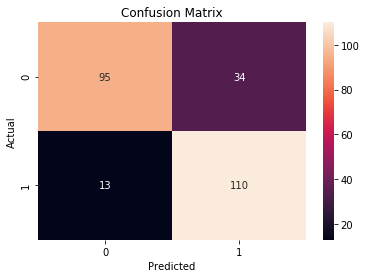

Classification Accuracy: 0.8134920634920635
Classification Error: 0.1865079365079365
False Positive Rate: 0.26356589147286824
Precision: 0.7638888888888888
AUC Score: 0.8153715258082813
Cross-validated AUC: 0.8923527105734766


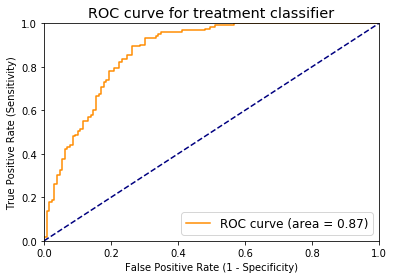

r-square 0.2535450935904706


In [30]:
logisticRegression()

In [31]:
logreg =  LogisticRegression(solver='lbfgs',penalty = 'l2',max_iter = 200,fit_intercept= False)
logreg.fit(X_train, y_train)
std_coef = np.std(np.array(X_train),axis=0)*logreg.coef_
coef_dict = {}
i = 0
for col in X_train.columns:
    coef_dict[col] = round(std_coef[0][i],4)
    i+=1



In [32]:
print('Top-10 Most Important Features\n')
print('{:25}{:10}'.format('Features','Std_Coef'))
for w in sorted(coef_dict, key=coef_dict.get, reverse=True)[:10]:
  print ('{:25} {:7}'.format(w, coef_dict[w]))

Top-10 Most Important Features

Features                 Std_Coef  
work_interfere_Sometimes   0.7427
work_interfere_Often       0.6275
work_interfere_Rarely      0.3467
seek_help_Don't know        0.246
family_history_Yes         0.2315
care_options_Yes            0.214
coworkers_Yes              0.2042
benefits_Yes                0.179
supervisor_No              0.1767
anonymity_Yes              0.1637


Text(0.5, 1.0, 'Top 10 Important Features (Log. Regres.)')

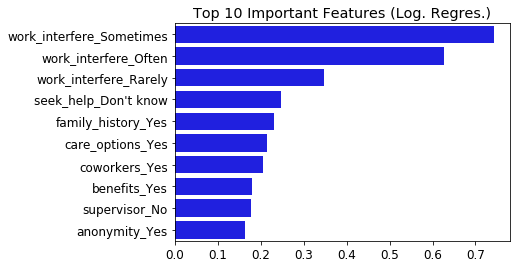

In [33]:
features = []
coefs = []
for w in sorted(coef_dict, key=coef_dict.get, reverse=True)[:10]:
    features.append(w)
    coefs.append(coef_dict[w])

sns.barplot(x=coefs, y=features,
            label="Std Coef", color="b").set_title('Top 10 Important Features (Log. Regres.)')


### KNeighbors Classifier

In [34]:
def Knn():
    knn = KNeighborsClassifier()
    tuningMultParam(knn)
    
    # train a KNeighborsClassifier model on the training set
    knn = KNeighborsClassifier(metric= 'matching', n_neighbors= 15, weights= 'distance')
    knn.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = knn.predict(X_test)
    
    print('########### KNeighborsClassifier ###############')
    
    accuracy_score = evalClassModel(knn, y_test, y_pred_class, True)

    #Data for final graph
    methodDict['KNN'] = accuracy_score * 100

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance'], 'metric': ['jaccard', 'dice', 'euclidean', 'matching']}
grid_mean_scores:
0      0.675418
1      0.675418
2      0.650756
3      0.673827
4      0.725537
5      0.724741
6      0.692920
7      0.719173
8      0.731901
9      0.732697
10     0.718377
11     0.743039
12     0.751790
13     0.750199
14     0.722355
15     0.750994
16     0.750994
17     0.748608
18     0.724741
19     0.754177
20     0.751790
21     0.754177
22     0.733492
23     0.762928
24     0.758154
25     0.758154
26     0.743039
27     0.764519
28     0.764519
29     0.766110
         ...   
210    0.752586
211    0.768496
212    0.762132
213    0.766905
214    0.748608
215    0.762928
216    0.757359
217    0.762132
218    0.752586
219    0.765314
220    0.758950
221    0.763723
222    0.736675
223    0.754177
224    0.751790
225    0.759745
226    0.

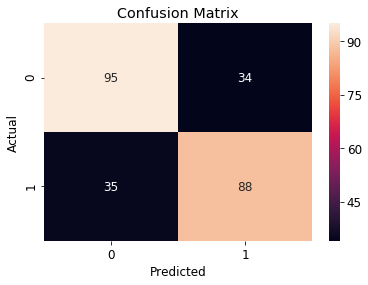

Classification Accuracy: 0.7261904761904762
Classification Error: 0.27380952380952384
False Positive Rate: 0.26356589147286824
Precision: 0.7213114754098361
AUC Score: 0.7259406314993382
Cross-validated AUC: 0.8441024225550434


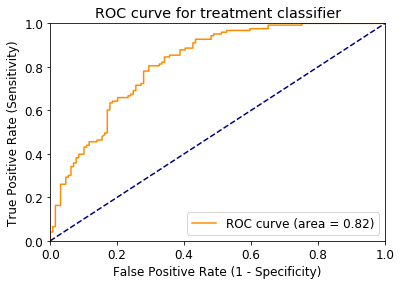

In [35]:
Knn()

In [37]:
def treeClassifier():
    # Calculating the best parameters
    tree = DecisionTreeClassifier()
    featuresSize = feature_cols.__len__()
    param_dist = {"max_depth": [3, None],
              "max_features": randint(1, featuresSize),
              "min_samples_split": randint(2, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
    tuningRandomizedSearchCV(tree, param_dist)
    
    # train a decision tree model on the training set
    tree = DecisionTreeClassifier(max_depth=None, min_samples_split=7, max_features=21, criterion='entropy', min_samples_leaf=7)
    tree.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = tree.predict(X_test)
    
    print('########### Tree classifier ###############')
    
    accuracy_score = evalClassModel(tree, y_test, y_pred_class, True)

    #Data for final graph
    methodDict['Tree clas.'] = accuracy_score * 100

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.003218      0.001362         0.001313        0.000461   
1       0.003117      0.000972         0.001579        0.000399   
2       0.002652      0.000774         0.000922        0.000128   
3       0.002189      0.000314         0.000927        0.000163   
4       0.002261      0.000432         0.000868        0.000076   
5       0.003028      0.000192         0.000895        0.000123   
6       0.001880      0.000032         0.000822        0.000024   
7       0.001737      0.000043         0.000810        0.000013   
8       0.002017      0.000076         0.000838        0.000009   
9       0.001890      0.000020         0.000820        0.000015   

  param_criterion param_max_depth param_max_features param_min_samples_leaf  \
0         entropy               3                 16                      6   
1            gini               3                 10                      1   
2         entropy        

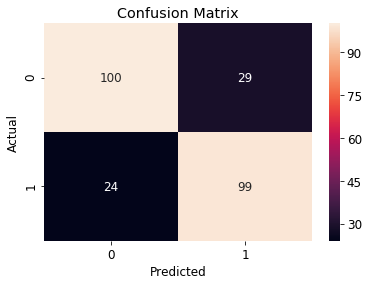

Classification Accuracy: 0.7896825396825397
Classification Error: 0.21031746031746035
False Positive Rate: 0.2248062015503876
Precision: 0.7734375
AUC Score: 0.7900359236150502
Cross-validated AUC: 0.8615861415130569


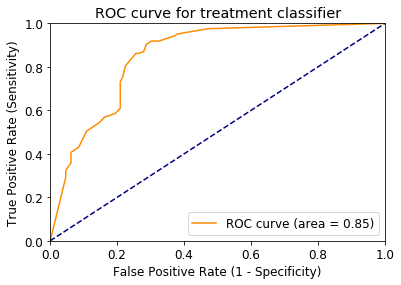

In [38]:
treeClassifier()

In [39]:
tree = DecisionTreeClassifier(max_depth=None, min_samples_split=7, max_features=21, criterion='entropy', min_samples_leaf=7)
tree.fit(X_train, y_train)
                                                    
                                                    

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=21, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [40]:
tree.get_depth()

12

In [41]:
feature_importance = dict(zip(X_train.columns,tree.feature_importances_))


In [42]:
for f in sorted(feature_importance, key=feature_importance.get, reverse=True)[:10]:
  print ('{:10} {:8}'.format(f, feature_importance[f]))



work_interfere_Don't know 0.28164552190353
family_history_Yes 0.1900293993230738
work_interfere_Never 0.08427907217389806
work_interfere_Sometimes 0.0675698943209424
seek_help_No 0.0397755177188444
work_interfere_Often 0.028739702490421015
care_options_Yes 0.028169514762128072
coworkers_No 0.022558794700204936
mental_health_consequence_Maybe 0.022478399845484335
Gender_female 0.020170372989502455


Text(0.5, 1.0, 'Top 10 Important Features (Tree)')

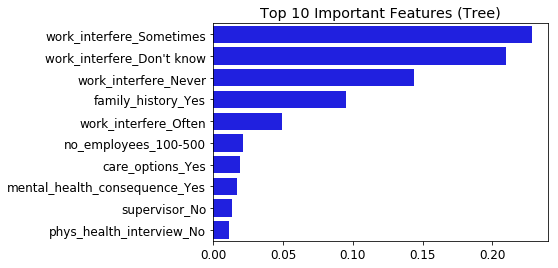

In [47]:
features = []
coefs = []
for w in sorted(feature_importance, key=feature_importance.get, reverse=True)[:10]:
    features.append(w)
    coefs.append(feature_importance[w])

sns.barplot(x=coefs, y=features,
            label="Std Coef", color="b").set_title('Top 10 Important Features (Tree)')


In [44]:
from sklearn.tree import export_graphviz
export_graphviz(tree,out_file='tree.dot', feature_names=X_train.columns)


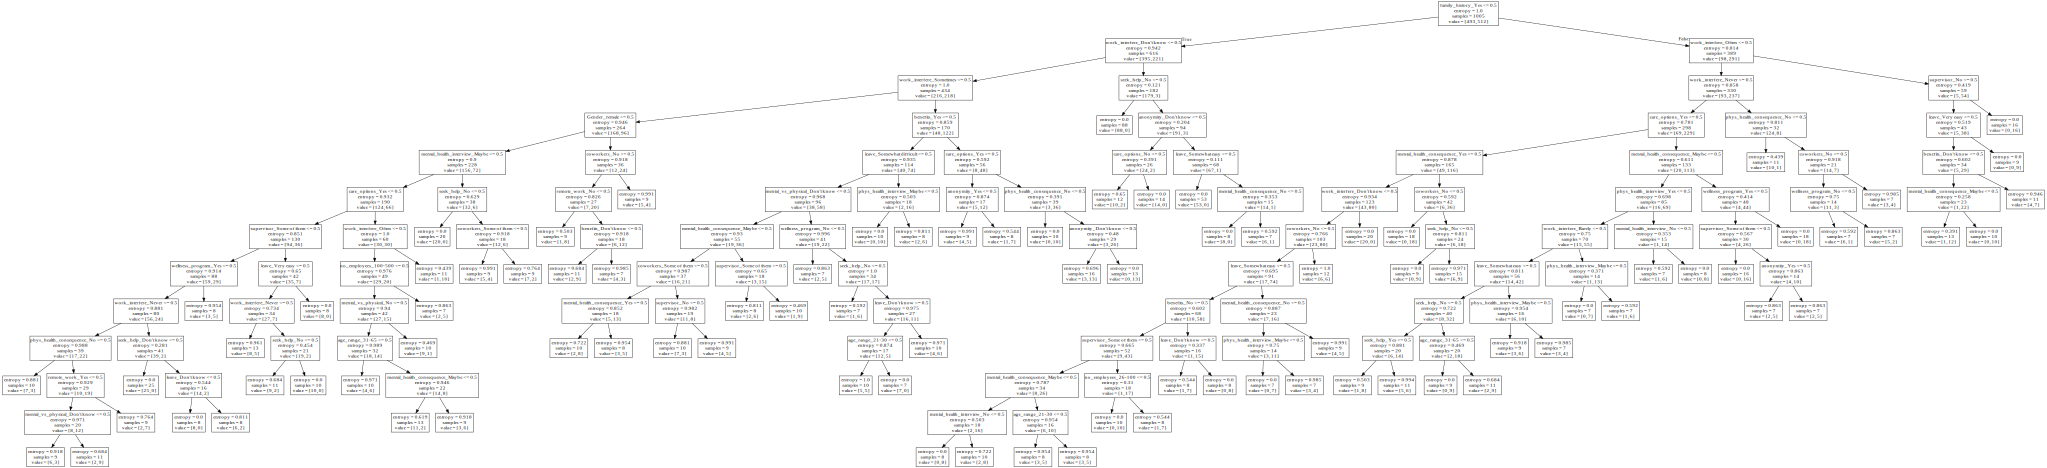

In [45]:
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [51]:
#from os import system
#system('dot -Tpng tree.dot -o tree.png -Gdpi=600')

0

## Naive Bayes

In [46]:
def NB():
    gnb = GaussianNB()
    
    # train a GaussianNB classifier model on the training set

    gnb.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = gnb.predict(X_test)
    
    print('########### GaussianNBClassifier ###############')
    
    accuracy_score = evalClassModel(gnb, y_test, y_pred_class, True)

    #Data for final graph
    methodDict['NB'] = accuracy_score * 100

########### GaussianNBClassifier ###############
Null accuracy:
 0    129
1    123
Name: Yes, dtype: int64
Actual Class ('Yes') : 0.4880952380952381
Actual Class ('No') : 0.5119047619047619


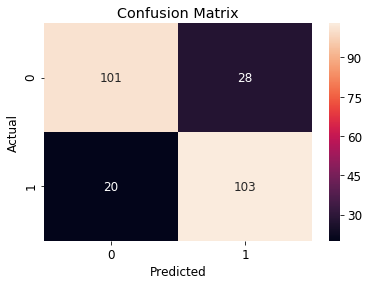

Classification Accuracy: 0.8095238095238095
Classification Error: 0.19047619047619047
False Positive Rate: 0.21705426356589147
Precision: 0.7862595419847328
AUC Score: 0.8101720552089242
Cross-validated AUC: 0.874020737327189


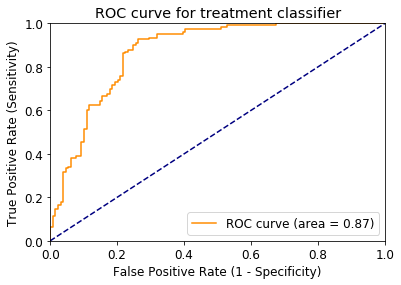

In [47]:
NB()

In [48]:
def BNB():
    bnb = BernoulliNB()
    
    # train a BernoulliNB classifier model on the training set

    bnb.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = bnb.predict(X_test)
    
    print('########### BernoulliNBClassifier ###############')
    
    accuracy_score = evalClassModel(bnb, y_test, y_pred_class, True)

    #Data for final graph
    methodDict['BNB'] = accuracy_score * 100


########### BernoulliNBClassifier ###############
Null accuracy:
 0    129
1    123
Name: Yes, dtype: int64
Actual Class ('Yes') : 0.4880952380952381
Actual Class ('No') : 0.5119047619047619


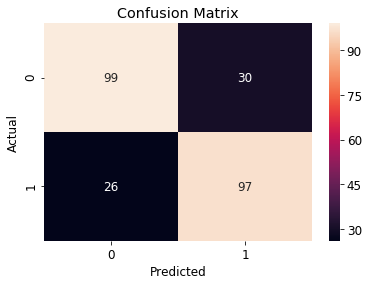

Classification Accuracy: 0.7777777777777778
Classification Error: 0.2222222222222222
False Positive Rate: 0.23255813953488372
Precision: 0.7637795275590551
AUC Score: 0.778029873321989
Cross-validated AUC: 0.8731578821044547


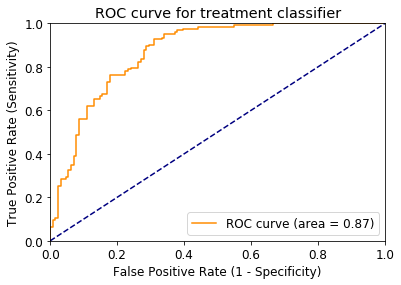

In [49]:
BNB()

In [50]:
def plotSuccess():
    s = pd.Series(methodDict)
    s = s.sort_values(ascending=False)
    plt.figure(figsize=(12,8))
    #Colors
    ax = s.plot(kind='bar') 
    for p in ax.patches:
        ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))
    plt.ylim([70.0, 90.0])
    plt.xlabel('Method')
    plt.ylabel('Accuracy')
    plt.title('Success of methods')
     
    plt.show()

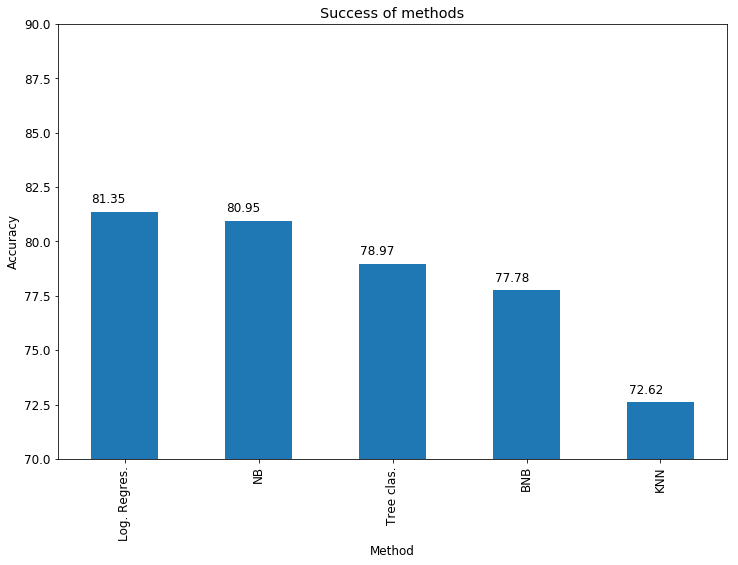

In [51]:
plotSuccess()